In [33]:
# Import the modules
import rotational_diffusion_photophysics as rdp
import numpy as np
import matplotlib.pyplot as plt
from codetiming import Timer

<Figure size 432x288 with 0 Axes>

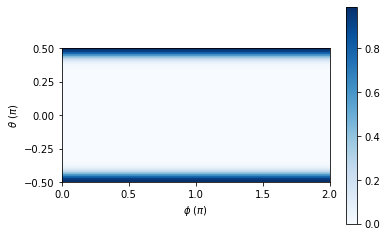

In [34]:
# Angular dependence of k21 in Hz
lmax = 25

omega = rdp.make_angles(lmax)
c0a = np.sin(omega[0])**50
c0grid, c0, c0coeffs = rdp.make_grid(c0a, lmax)

plt.figure()
c0grid = rdp.vec2grid(c0)
rdp.plot_proj(c0grid, clims=[])


In [35]:
# Array with all the diffusion tensors/scalar for every specie.
# In this case every specie diffuse with the same rate.
D = 1/(6*100e-6)
Dvec = [D]
Kmatrix = [0]
M = rdp.kinetics_diffusion_matrix_lmax(Dvec, Kmatrix, lmax)

In [93]:
# Solve the time evolution
time = np.linspace(0,600e-6,100)
c, L, U = rdp.solve_evolution(M, np.array([c0]), time)

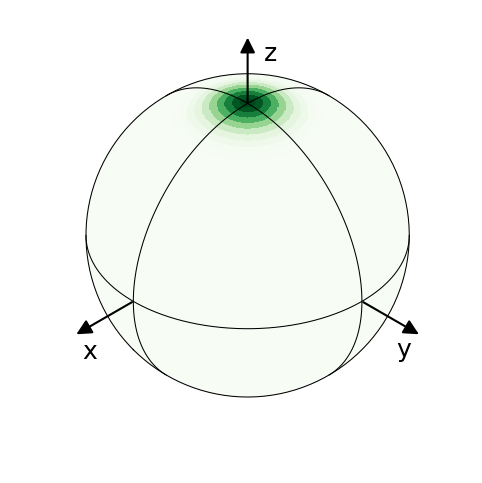

In [105]:
from plot_data_sphere import plot_data_sphere
import matplotlib.animation as animation
plt.rcParams['animation.ffmpeg_path'] = 'C:/Users/andre/Documents/ffmpeg/ffmpeg-4.3.2-2021-02-27-essentials_build/bin/ffmpeg.exe'

cgrid = rdp.vec2grid(c[0,:,0], lmax=32)
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection='3d')
cmap = plt.cm.Greens
sph = plot_data_sphere(ax, cgrid.data, vmax=[], scale=3, cmap=cmap, plot_colorbar=False)

In [110]:
def animate(i):
    cgrid = rdp.vec2grid(c[0,:,i], lmax=32)
    cdata = cgrid.data[0:-1,0:-1].flatten()
    cdata = cdata / np.max(cdata)
    sph.set_facecolors(cmap(cdata))
    return sph,

ani = animation.FuncAnimation(
    fig, animate, interval=40, blit=True, save_count=time.size)
ani.save("rotational_diffusion_from_top.mp4", bitrate=2000)

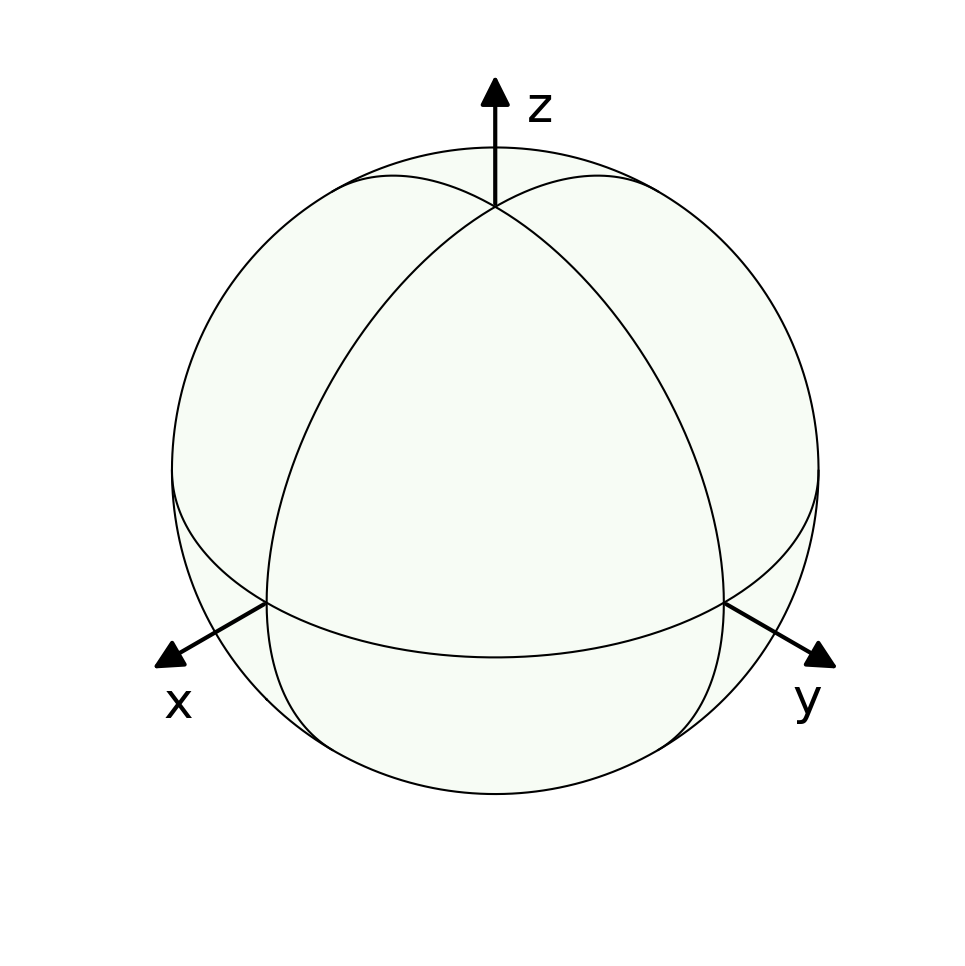

In [113]:
cgrid = rdp.vec2grid(c[0,:,0]*0, lmax=32)
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection='3d')
cmap = plt.cm.Greens
sph = plot_data_sphere(ax, cgrid.data, scale=3, cmap=cmap, plot_colorbar=False)

plt.savefig('empty_sphere.png')